In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#miscellaneous libraries used
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

#importing the NLP and Data Visualisation related libraries
import string
from string import ascii_letters, punctuation, digits
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Kiran B S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Kiran B S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to C:\Users\Kiran
[nltk_data]    |     B S\AppData\Roaming\nltk_data.

[nltk_data]    | Downloading package mte_teip5 to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\mte_teip5.zip.
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | Downloading package names to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\names.zip.
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Kiran B S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | 

[nltk_data]    | Downloading package unicode_samples to C:\Users\Kiran
[nltk_data]    |     B S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\unicode_samples.zip.
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Kiran B S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\universal_tagset.zip.
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\Kiran B S\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package vader_lexicon to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package verbnet to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet.zip.
[nltk_data]    | Downloading package verbnet3 to C:\Users\Kiran B
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package web

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
products = pd.read_csv("flipkart_com-ecommerce_sample.csv")
products.head(15)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [4]:
products.shape

(20000, 15)

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [6]:
print(products.isna().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64


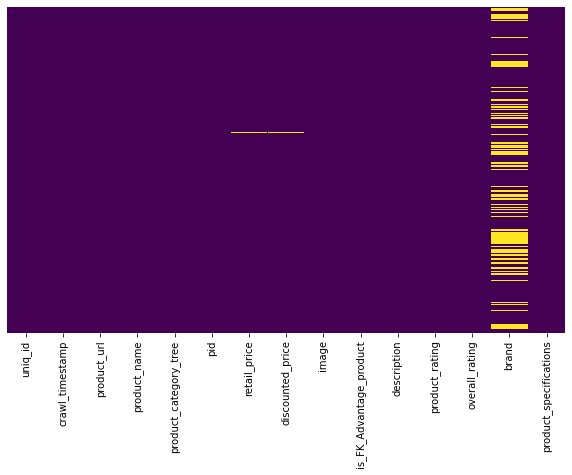

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(products.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

In [8]:
#keeping only those datapoints whose description is not NaN
products = products[products['description'].notna()]
#keeping only those datapoints product_category_tree is not NaN
products = products[products['product_category_tree'].notna()]
#dropping the datapoints with duplicate descriptions
products = products.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
products = products.reset_index(drop=True)
products

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17534,3ab6fae88a53a66dd7c3cbf6fc9fbd3c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEBU65TYHDZPGX,3559.0,1369.0,"[""http://img5a.flixcart.com/image/sticker/p/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
17535,d5a16fb788c38554feb734c15d66be6b,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UWNR43SZ4,3016.0,2194.0,"[""http://img6a.flixcart.com/image/sticker/5/q/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
17536,43c9e22c8e9d67c0ef63f6b2d11671d7,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEBU65VMEQGTZY,7069.0,2719.0,"[""http://img5a.flixcart.com/image/sticker/t/z/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
17537,b90031c6daba26d176aeda12eb3960d3,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers S

In [9]:
#list of all the columns in the dataset
print(products.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [10]:
#dropping the columns which do not add much meaning to our problem statement
products = products.drop(['uniq_id',
               'crawl_timestamp', 
               'product_url', 
               'pid', 
               'retail_price', 
               'discounted_price',
               'image',
               'product_rating',
               'overall_rating',
               'is_FK_Advantage_product',
               'product_specifications'], axis = 1)

In [11]:
products.head()

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


# lineplot

In [12]:
#Creating a temporary Dataframe 
temp_df = products.copy(deep=True)

# Delete the rows and having brand as NaN values 
temp_df = temp_df[temp_df['brand'].notna()]
temp_df


,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
17534,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
17535,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra
17536,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra
17537,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra


In [13]:
temp_df.shape

(12273, 4)

In [15]:
#creating a list of all the unique brand names
brands_df = list(dict.fromkeys(list(temp_df.loc[:, 'brand'].values)))

brand_keys = [] #corresponds to the unique brand names
brand_freq = [] #corresponds to the count of the product for a brand

for brand in brands_df:
    #getting the count for that brand
    count = np.sum(temp_df.loc[:, 'brand'].values == brand)
    if count>=10:
        brand_keys.append(brand)
        brand_freq.append(count)

In [16]:
max_count = max(brand_freq)
idx = brand_freq.index(max_count)
print("The brand having maximum amount of products on Flipkart is {} with {} many products".format(brand_keys[idx],max_count))

The brand having maximum amount of products on Flipkart is Allure Auto with 469 many products


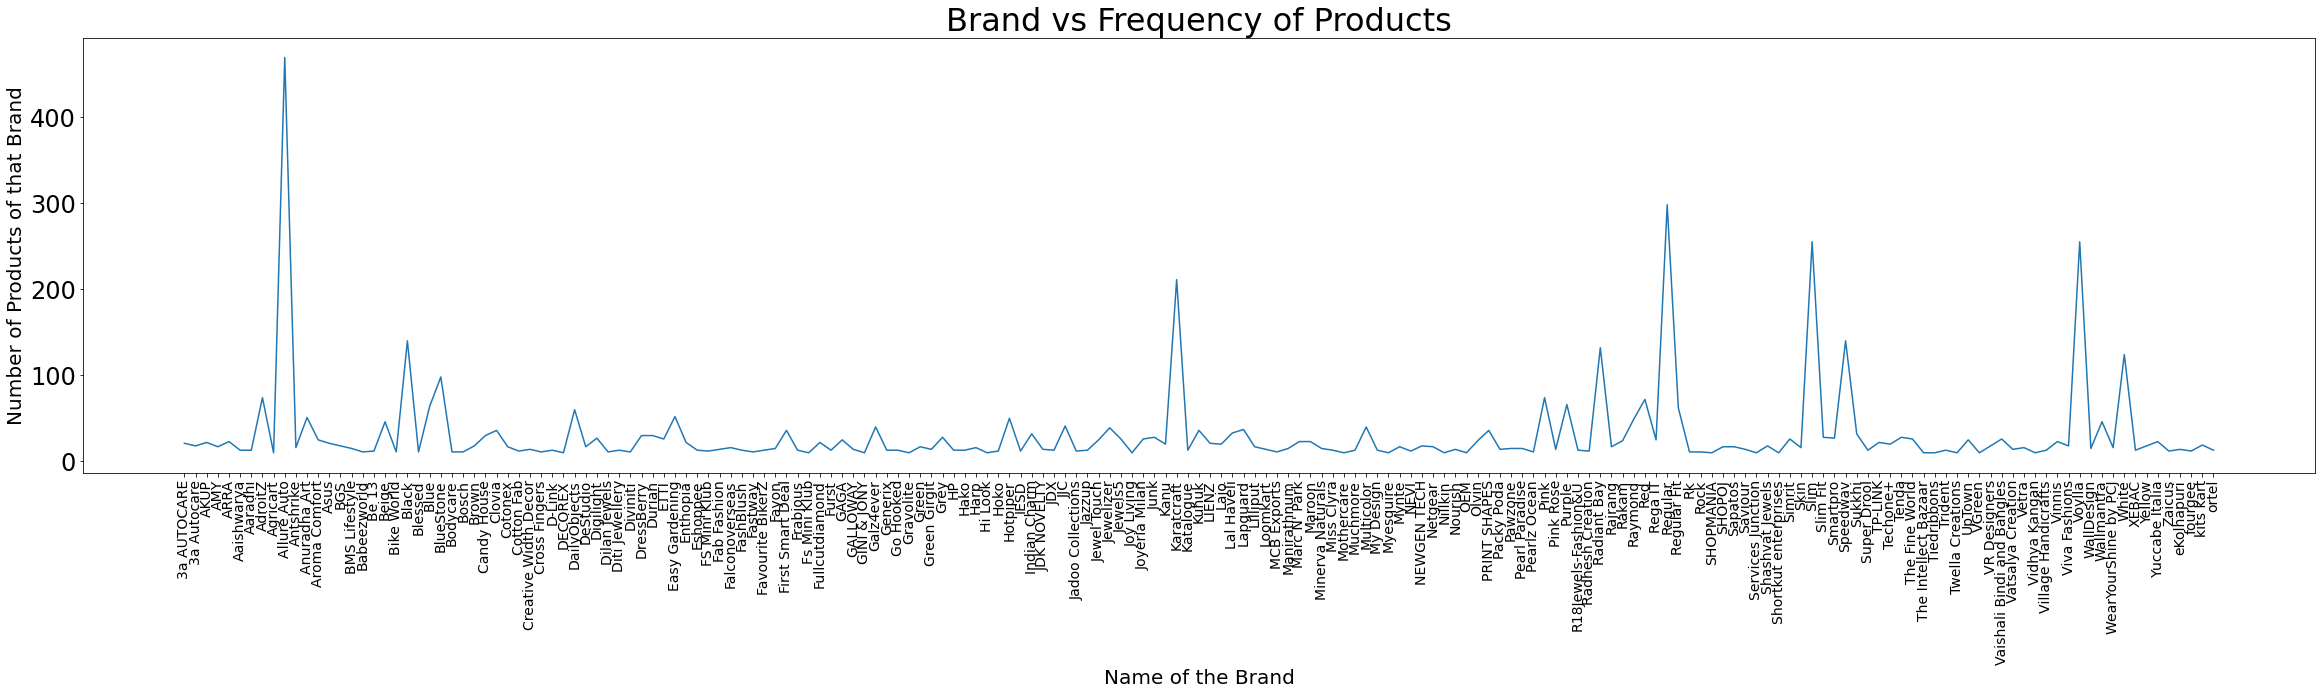

In [17]:
plt.figure(figsize=(40,8))
plt.title("Brand vs Frequency of Products", fontsize=32)
plt.ylabel("Number of Products of that Brand", fontsize=20)
plt.xlabel("Name of the Brand", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=brand_keys, y=brand_freq)
plt.show()

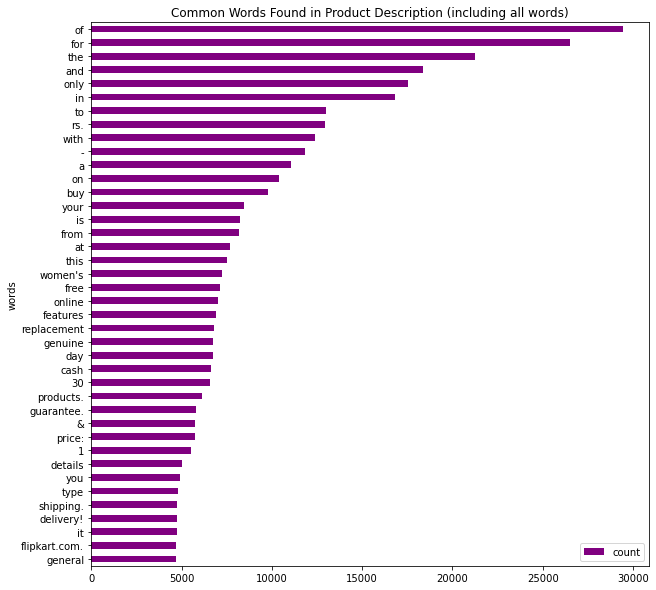

In [18]:
#Bar Graph of the most common words in Product Description

def most_frequent_words(description):

    for i in range(len(description)):
        description[i] = description[i].lower().split()

    all_words = list(itertools.chain(*description))
    word_counts = Counter(all_words)

    #creating a pandas dataframe of the 40 most common words in the dataset
    clean_description = pd.DataFrame(word_counts.most_common(40),
                                    columns=['words', 'count'])

    return clean_description

description = products["description"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words)")
plt.show()

In [21]:
categories_in_df = list(dict.fromkeys(list(products.loc[:,'product_category_tree'].values)))
print("The unique Product Categories in this dataset are {}".format(len(categories_in_df)))

for category in categories_in_df:
    count = np.sum(products.loc[:, 'product_category_tree'].values == category)
    if(count>=10):
        print(category,"\t",count)

The unique Product Categories in this dataset are 6463
["Footwear >> Women's Footwear >> Casual Shoes >> Boots"] 	 106
["Clothing >> Men's Clothing >> Jeans >> Reckler Jeans"] 	 16
["Jewellery >> Rings"] 	 692
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Shilpkala Tops"] 	 14
["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Herberto Dresses"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Tapyti Tops"] 	 11
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Cation Tops"] 	 39
["Footwear >> Women's Footwear >> Flats"] 	 59
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> DailyObjects Cases & Covers"] 	 60
["Clothing >> Men's Clothing >> Navaksha Men's Clothing"] 	 17
["Footwear >> Women's Footwear >> Heels"] 	 81
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> FabAlley Tops"] 	 14
["Clothing >> Wom

["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> BMS Lifestyle Cases & Covers"] 	 15
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Clovia Bras"] 	 22
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Bralux Bras"] 	 10
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Exterior >> Door & Bumper Guards"] 	 17
["Clothing >> Men's Clothing >> T-Shirts >> Nucode T-Shirts"] 	 38
["Clothing >> Men's Clothing >> Shirts >> Casual & Party Wear Shirts >> Marc N' Park Casual & Party Wear Shirts >> Marc N' Park Men's Solid Casual Shirt"] 	 18
["Jewellery >> Accessories >> Brooches >> Anuradha Art Silver Polished Brooch (Gold)"] 	 18
["Automotive >> Accessories & Spare parts >> Spares & Performance Parts >> Car Spare Parts >> Vehicle Horns"] 	 47
["Home Decor & Festive Needs >> Wall Decor & Clocks >> Wall Decals & Stickers >> DeStudio Wall Decals & Stickers"] 	 15
["Home Decor & Festive Needs >> Wall Decor & 

In [22]:
primary_category = products["product_category_tree"].tolist()

#lowercasing the categories to prevent duplicate categories and removal of punctuations like ">>", etc
for i in range(len(primary_category)):
    primary_category[i] = primary_category[i].lower()
    primary_category[i] = primary_category[i].replace('["',"")
    primary_category[i] = primary_category[i].replace('"]',"")
    primary_category[i] = primary_category[i].replace(" ","")
    primary_category[i] = primary_category[i].split(">>") 
    primary_category[i] = primary_category[i][0]

print(primary_category)
print(len(primary_category))

['clothing', 'furniture', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'furniture', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'pens&stationery', 'clothing', 'furniture', 'footwear', 'clothing', 'furniture', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'beautyandpersonalcare', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'pens&stationery', 'pens&stationery', 'pens&stationery', 'clothing', 'pens&stationery', 'clothing', 'bags,wallets&belts', 'clothing', 'footwear', 'homedecor&festiveneeds', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsummersiblesinglephasepumpcontroller...', "masarasolidwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", 'tools&hardw

The length of the unique Product Categories after some filtering is 265


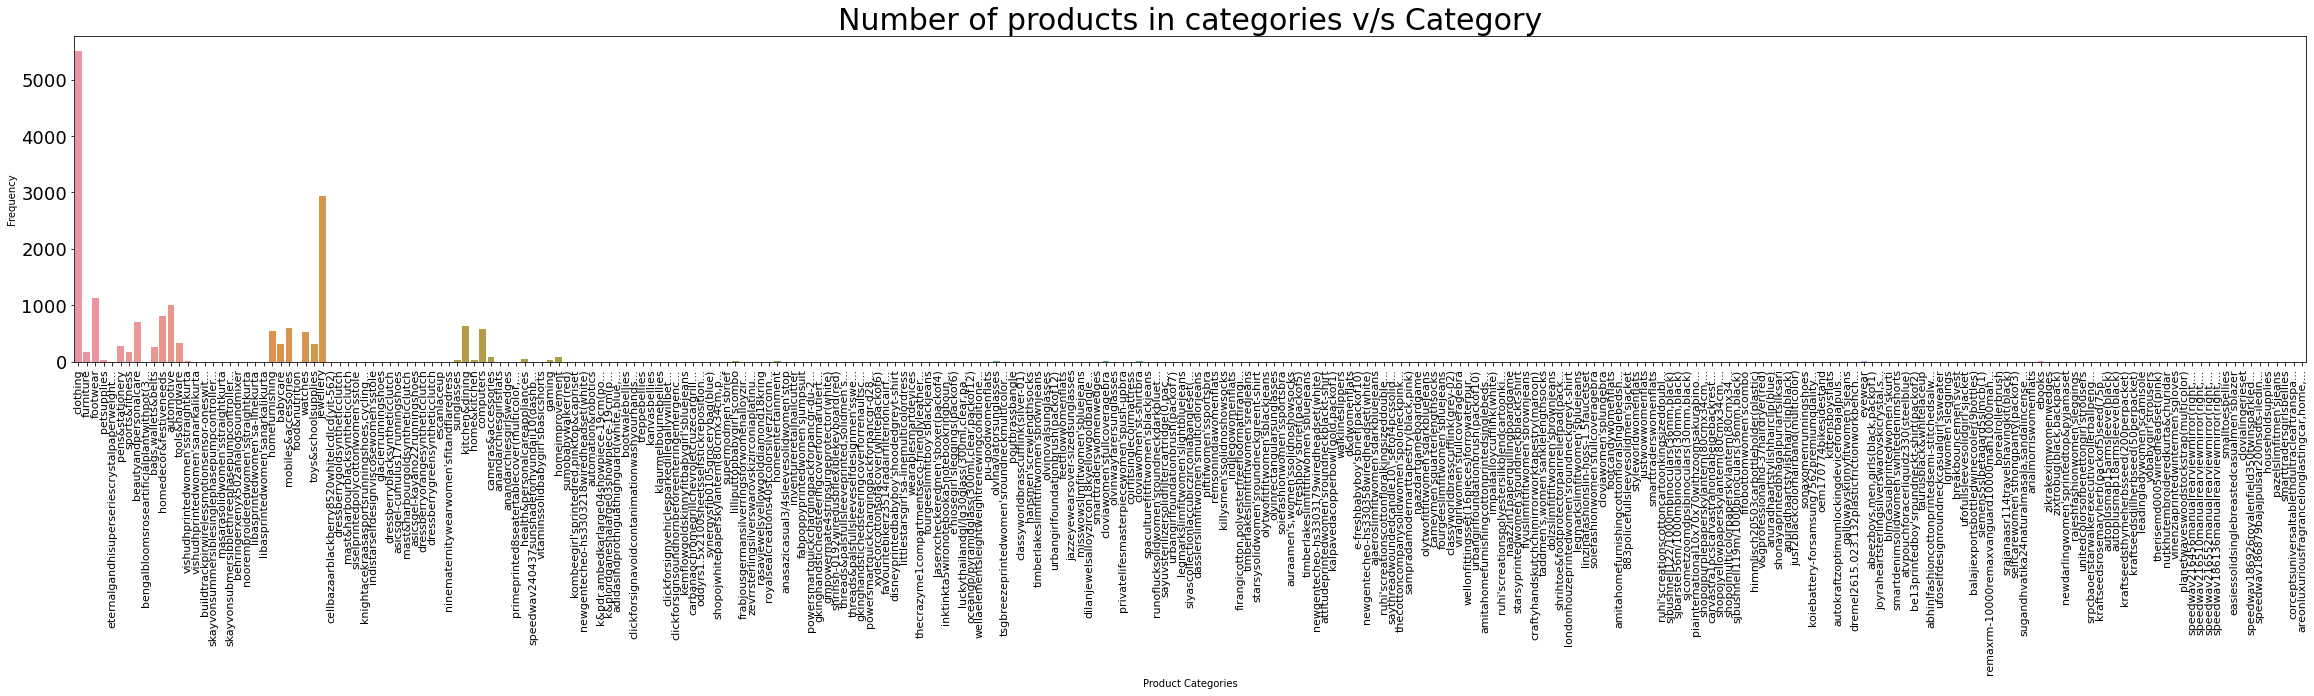

In [23]:
#filtering out some of the categories with count less than 10 
primary_category_count = Counter(primary_category)
print("The length of the unique Product Categories after some filtering is {}".format(len(primary_category_count)))

all_categories_temp=[]
count_temp=[]

for keys,vals in primary_category_count.items():
    all_categories_temp.append(keys)
    count_temp.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories_temp, y=count_temp)

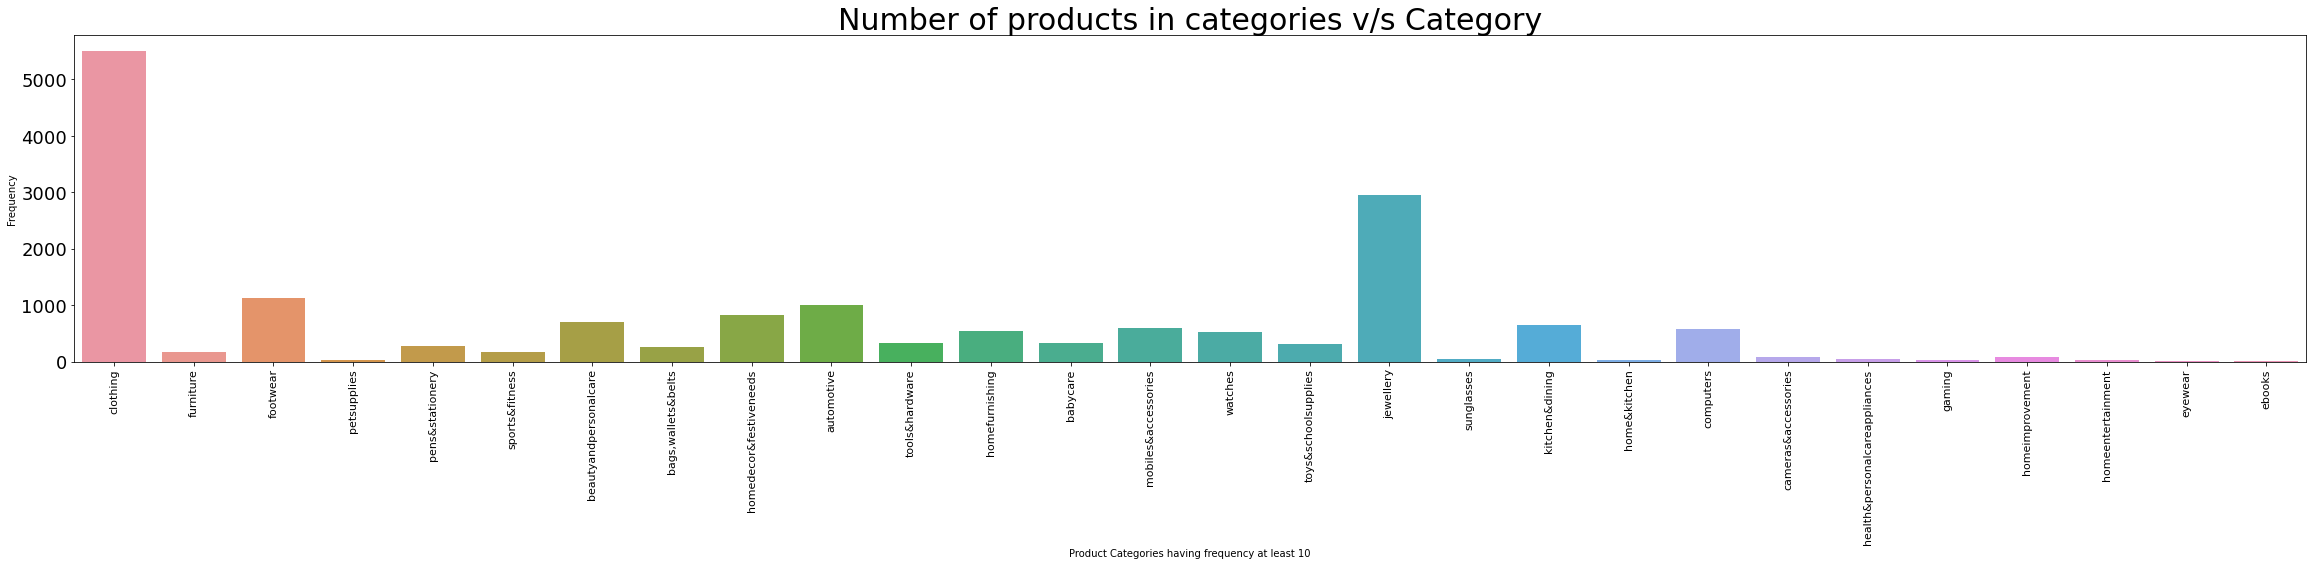

In [24]:
all_categories=[]
count=[]

for keys,vals in primary_category_count.items():
  #choosing only those categories which have at least 10 producrs
  if(vals>=10):
    all_categories.append(keys)
    count.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories having frequency at least 10")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories, y=count)

In [25]:
revised_categories = [None]*len(primary_category)

for i in range(len(primary_category)):
    if primary_category[i]=="homeimprovement" or primary_category[i]=="homedecor&festiveneeds" or primary_category[i]=='home&kitchen' or primary_category[i]=="kitchen&dining" or primary_category[i]=="homefurnishing" or primary_category[i]=="furniture" or primary_category[i]=="homeentertainment":
        revised_categories[i] = 'homefurnishing/kitchen'
    elif primary_category[i]=='pens&stationery':
        revised_categories[i] = 'toys&schoolsupplies'
    elif primary_category[i]=='gaming' or primary_category[i]=='cameras&accessories' or primary_category[i]=='computers' or primary_category[i]=="mobiles&accessories":
        revised_categories[i]='electronics'
    elif primary_category[i]=='health&personal care appliances' or primary_category[i]=='beautyandpersonalcare' or primary_category[i]=='eyewear' or primary_category[i]=='sunglasses' or primary_category[i]=='watches' or primary_category[i]=='bags,wallets&belts' or primary_category[i]=='health&personalcareappliances':
        revised_categories[i]='personalaccessories'
    else:
        revised_categories[i] = primary_category[i]

print("The length of the revised grouped categories are {}".format(len(Counter(revised_categories))))
print(revised_categories)

The length of the revised grouped categories are 250
['clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'homefurnishing/kitchen', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'personalaccessories', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'toys&schoolsupplies', 'toys&schoolsupplies', 'toys&schoolsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'personalaccessories', 'clothing', 'footwear', 'homefurnishing/kitchen', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsum

In [26]:
#creating a new column in the dataframe which stores these revised grouped categories
products["primary_categories"] = revised_categories
products.head(20)

,product_name,product_category_tree,description,brand,primary_categories
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,eternalgandhisuperseriescrystalpaperweight...
6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear
9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing


In [28]:
temp_categories = list(dict.fromkeys(list(products.loc[:,'primary_categories'].values)))

considered_category = []
revised_category_count = {}
noise = {}
all_categories = {}

print("\n")
print("********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************")
print("\n")

for category in temp_categories:
    count = np.sum(products.loc[:, 'primary_categories'].values == category)
    all_categories[category]=count
    #a category is considered to be a main category only if the frequency of a product in that category is at least 10
    if(count>=10):
        print(category,count)
        revised_category_count[category] = count   
    else:
        noise[category] = count

    for i in range(len(revised_categories)):
        if revised_categories[i] in revised_category_count:
            considered_category.append(1)
        else:
            considered_category.append(0)

print("\n")
print("********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************")
print("\n")
for keys,vals in noise.items():
    print(keys,vals)

print("\n")
print("********************* THE NOISE + PRIMARY CATEGORIES IN THE DATASET ARE AS FOLLOWS *************************")
print("\n")
for keys,vals in all_categories.items():
    print(keys,vals)



********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************


clothing 5503
homefurnishing/kitchen 2307
footwear 1123
petsupplies 30
toys&schoolsupplies 591
sports&fitness 166
personalaccessories 1578
automotive 1009
tools&hardware 333
babycare 324
electronics 1284
jewellery 2946
ebooks 15


********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************


eternalgandhisuperseriescrystalpaperweight... 1
bengalbloomsroseartificialplantwithpot(3... 1
vishudhprintedwomen'sstraightkurta 8
vishudhprintedwomen'sanarkalikurta 1
buildtrackpirwirelessmotionsensor-oneswit... 1
skayvonsummersiblesinglephasepumpcontroller... 1
masarasolidwomen'sstraightkurta 5
skayvonsubmersibblethreephasepumpcontroller... 1
behringerxenyx502analogsoundmixer 1
noorembroideredwomen'sstraightkurta 1
libasprintedwomen'sa-linekurta 1
libasprintedwomen'sanarkalikurta 1
food&nutrition 2
cellbazaarblackberry8520whitelcdlcd(yit-562) 1
dressberryg

siemens5slbetagard5slmcb(1) 1
remaxrm-10000remaxvanguard10000mah10000mah... 1
borealrollerbrush 1
srajanaasr114travelshavingkit(black) 1
selfcarewomen'sthongpanty(packof3) 1
sugandhvatika24naturalmasala,sandalincense... 1
arialmorriswomenflats 1
ebooks 15
zikrakeximwomenwedges 1
zixtrobug(black,backpack) 1
newdarlingwomen'sprintedtop&pyjamaset 1
rajeshfashionwomen'sleggings 1
unitedcolorsofbenettongirl'strousers 1
srpcbaoerstarwalkerexecutiverollerballpeng... 1
kraftseedsrosemaryherb(packof5)seed(75p... 1
autoplusmap15armsleeve(black) 1
autoplusmap18armsleeve(black) 1
kraftseedsthymeherbsseed(200perpacket) 1
kraftseedsdillherbseed(50perpacket) 1
leadingladywomen'scamisole 1
yobabygirl'strousers 1
therisemd0005wiredheadset(pink) 1
nutkhutembroideredkurta&churidar 1
vinenziaprintedwintermen'sgloves 1
planetwaveswoodstockstrap(multicolor) 1
speedwav216456manualrearviewmirror(right,... 1
speedwav216510manualrearviewmirror(right,... 1
speedwav216552manualrearviewmirror(right,... 1
speedwav1

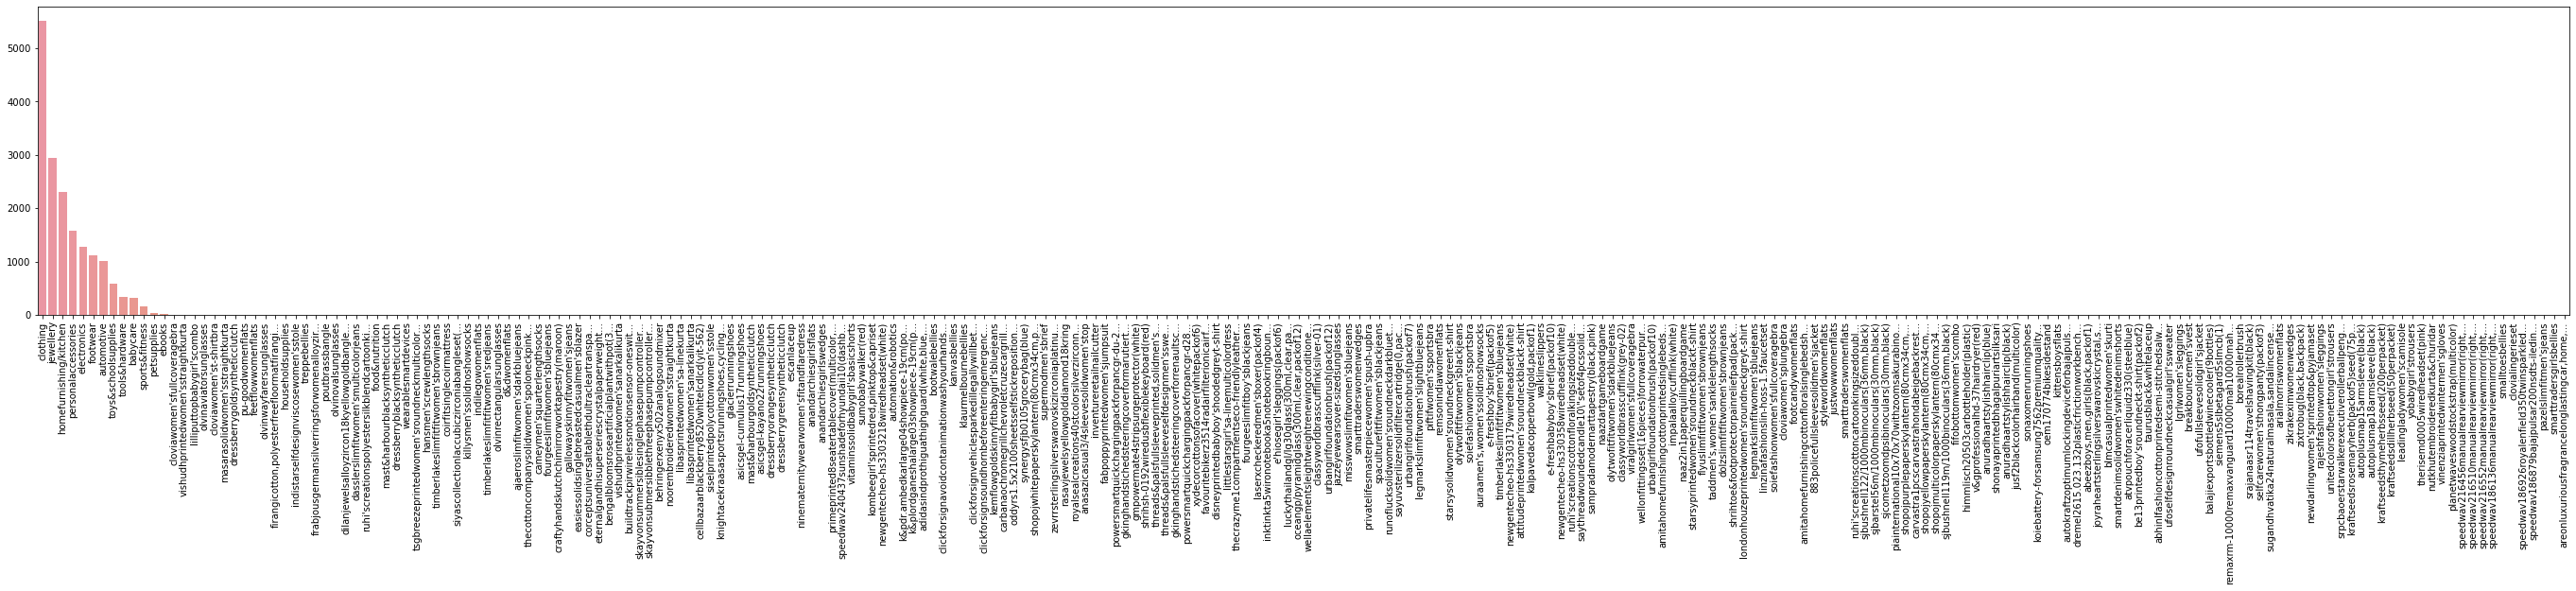

In [29]:
all_categories = dict(sorted(all_categories.items(), key=lambda item: item[1], reverse=True))

all_categories_keys = list(all_categories.keys())
all_categories_freq = list(all_categories.values())

fig = plt.figure(figsize = (48, 6))
plt.xticks(rotation=90)
sns.barplot(x=all_categories_keys ,y=all_categories_freq)

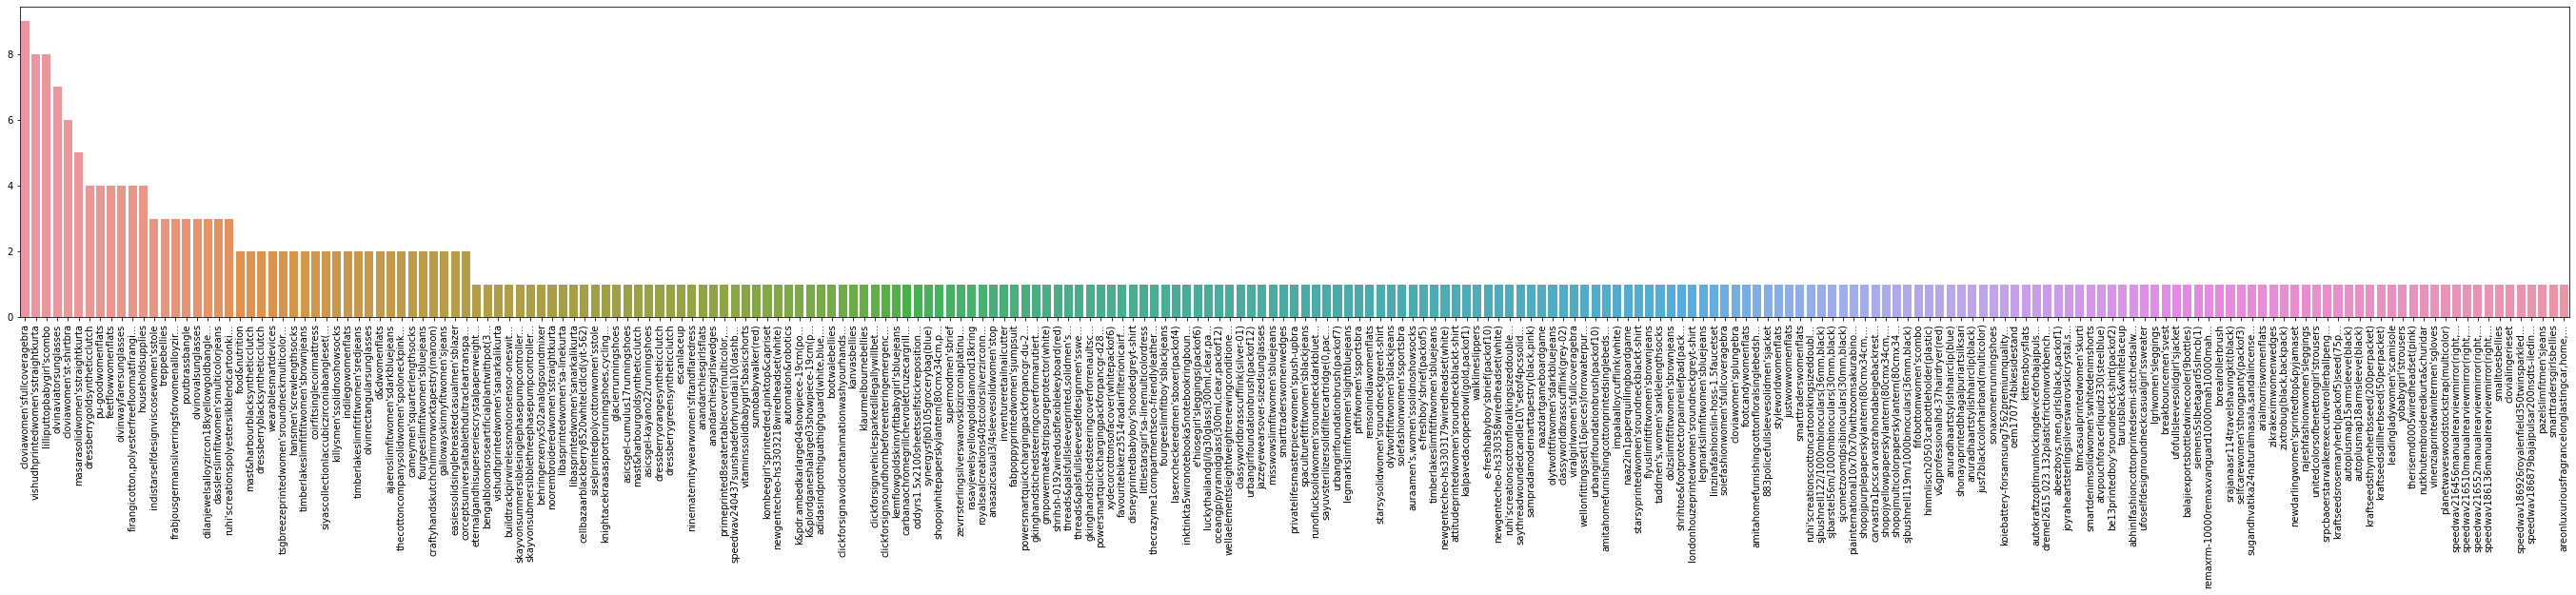

In [30]:
noise = dict(sorted(noise.items(), key=lambda item: item[1], reverse=True))

noise_keys = list(noise.keys())
noise_freq = list(noise.values())

fig = plt.figure(figsize = (48, 6))
plt.xticks(rotation=90)
sns.barplot(x=noise_keys ,y=noise_freq)

In [36]:
#finding the length of the description
max_desc_len = -1
desc_len_sum = 0
min_desc_len = maxsize

product_description = products["description"].tolist()

for i in range(len(product_description)):
    try:
        max_desc_len = max(max_desc_len,len(product_description[i]))
        min_desc_len = min(min_desc_len,len(product_description[i]))
        desc_len_sum+=len(product_description[i])
    except:
        pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(product_description)))

Max description length is 5309.
Min description length is 74.
Average description length is 439.53036090997205.


In [43]:
temp_categories = {
    'primary_category':categories,
    'count':frequency
}


temp_categories['primary_category'].append('noise')
temp_categories['count'].append(len(noise))
category_df = pd.DataFrame(temp_categories)
category_df = category_df.sort_values(by = 'count', ascending=False)
category_df = category_df.reset_index(drop=True)
category_df

,primary_category,count
0,clothing,5503
1,jewellery,2946
2,homefurnishing/kitchen,2307
3,personalaccessories,1578
4,electronics,1284
5,footwear,1123
6,automotive,1009
7,toys&schoolsupplies,591
8,tools&hardware,333
9,babycare,324


In [44]:
# a copy of the unbalanced dataset is made on which further work is done
balanced_df = products.copy(deep=True)
balanced2_df = products.copy(deep=True)
balanced_df

,product_name,product_category_tree,description,brand,primary_categories,desc_len
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,410
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,4433
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,650
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,403
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,248
...,...,...,...,...,...,...
17534,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,babycare,210
17535,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,222
17536,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,222
17537,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,222
